In [0]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import load
from matplotlib import pyplot
from keras.layers import Concatenate
 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# load all images in a directory into memory
def load_images(path, size=(256,512)):
    src_list, tar_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in listdir(path):
         # load and resize the image
         filename = path + '/' + filename
         pixels = load_img(filename, target_size=size)
         # convert to numpy array
         pixels = img_to_array(pixels)
         # split into satellite and map
         sat_img, map_img = pixels[:, :256], pixels[:, 256:]
         src_list.append(sat_img)
         tar_list.append(map_img)
    return asarray(src_list), asarray(tar_list)

In [0]:
path = "/content/drive/My Drive/Data/Pix2Pix/train"
for filename in listdir(path):
    print (filename)

In [0]:
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)


Loaded:  (1096, 256, 256, 3) (1096, 256, 256, 3)


In [0]:
print (type (src_images))

<class 'numpy.ndarray'>


In [0]:
# save as compressed numpy array
import numpy as np
filename = path + '/src_maps_256.npy'
np.save(filename,src_images ) 
print('Saved dataset: ', filename)

Saved dataset:  /content/drive/My Drive/Data/Pix2Pix/train/src_maps_256.npy


In [0]:
# save as compressed numpy array
import numpy as np
path = "/content/drive/My Drive/Data/Pix2Pix/train"
filename = path + '/maps_256.npz'
np.savez(filename, src_images, tar_images)

In [0]:
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	#X1 = (X1 - 127.5) / 127.5
	#X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [0]:
path = "/content/drive/My Drive/Data/Pix2Pix/train"
filename = path + '/maps_256.npz'
# load image data
src_images, tar_images = load_real_samples(filename)
print('Loaded', src_images.shape, tar_images.shape)

Loaded (1096, 256, 256, 3) (1096, 256, 256, 3)


In [0]:
src_images = dataset[0]
tar_images = dataset[1]

In [0]:
print (src_images.dtype)

float32


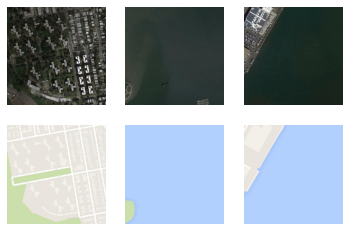

In [0]:
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

In [0]:
	#merged = Concatenate()([src_images[0], tar_images[0]])